**Breast Cancer Detection Using Machine Learning**

In [ ]:
#python module downloads
!pip  install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataframe as df
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
# from google.colab import files
# upload = files.upload()

In [ ]:
# df_1 = pd.read_csv('/content/data.csv')

In [ ]:
# df_1.head()

In [ ]:
# #installing the kaggle library
# ! pip install kaggle
# #make a directory named ".kaggle"
# ! mkdir ~/ .kaggle
# #copy the "kaggle.json" into this new directory
# ! cp kaggle.json ~/ .kaggle/
# #allocating the required permissions for this file
# ! chmod 600 ~/ .kaggle/kaggle.json

In [ ]:
# #downloading the datasets
# ! kaggle datasets download uciml/breast-cancer-wisconsin-data

In [ ]:
# #unzip the file
# ! unzip breast-cancer-wisconsin-data.zip

In [ ]:
# df_1.head()

In [ ]:
# EDA : Exploratory data analysis
#checking total number of rows and columns
df.shape

(569, 33)

In [ ]:
#checking the data and their corresponding data types
#the properties of the data - summary of the statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#2nd way for checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [ ]:
#drop the column with all missing values
# axis = 1: columns and axis = 2: rows
df = df.dropna(axis=1)

In [ ]:
df.shape

(569, 32)

In [ ]:
#checking datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [ ]:
# display the count for objects, here objects are benign(B) and malignant(M)
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

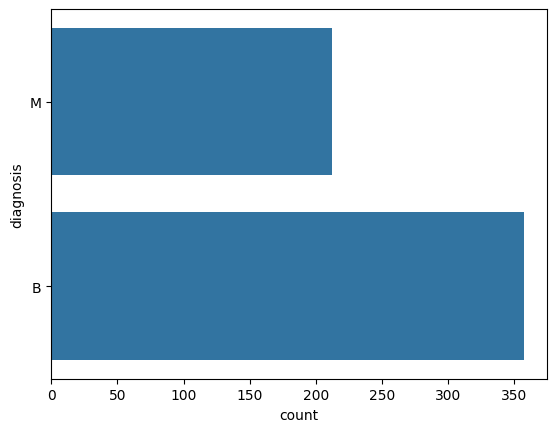

In [ ]:
#visual represention of diagnosis
sns.countplot(df['diagnosis'], label = 'count')

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()

In [ ]:
#transforming categorical data to numerical
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [ ]:
#printing the numerical values, M = 1, B = 0
df.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

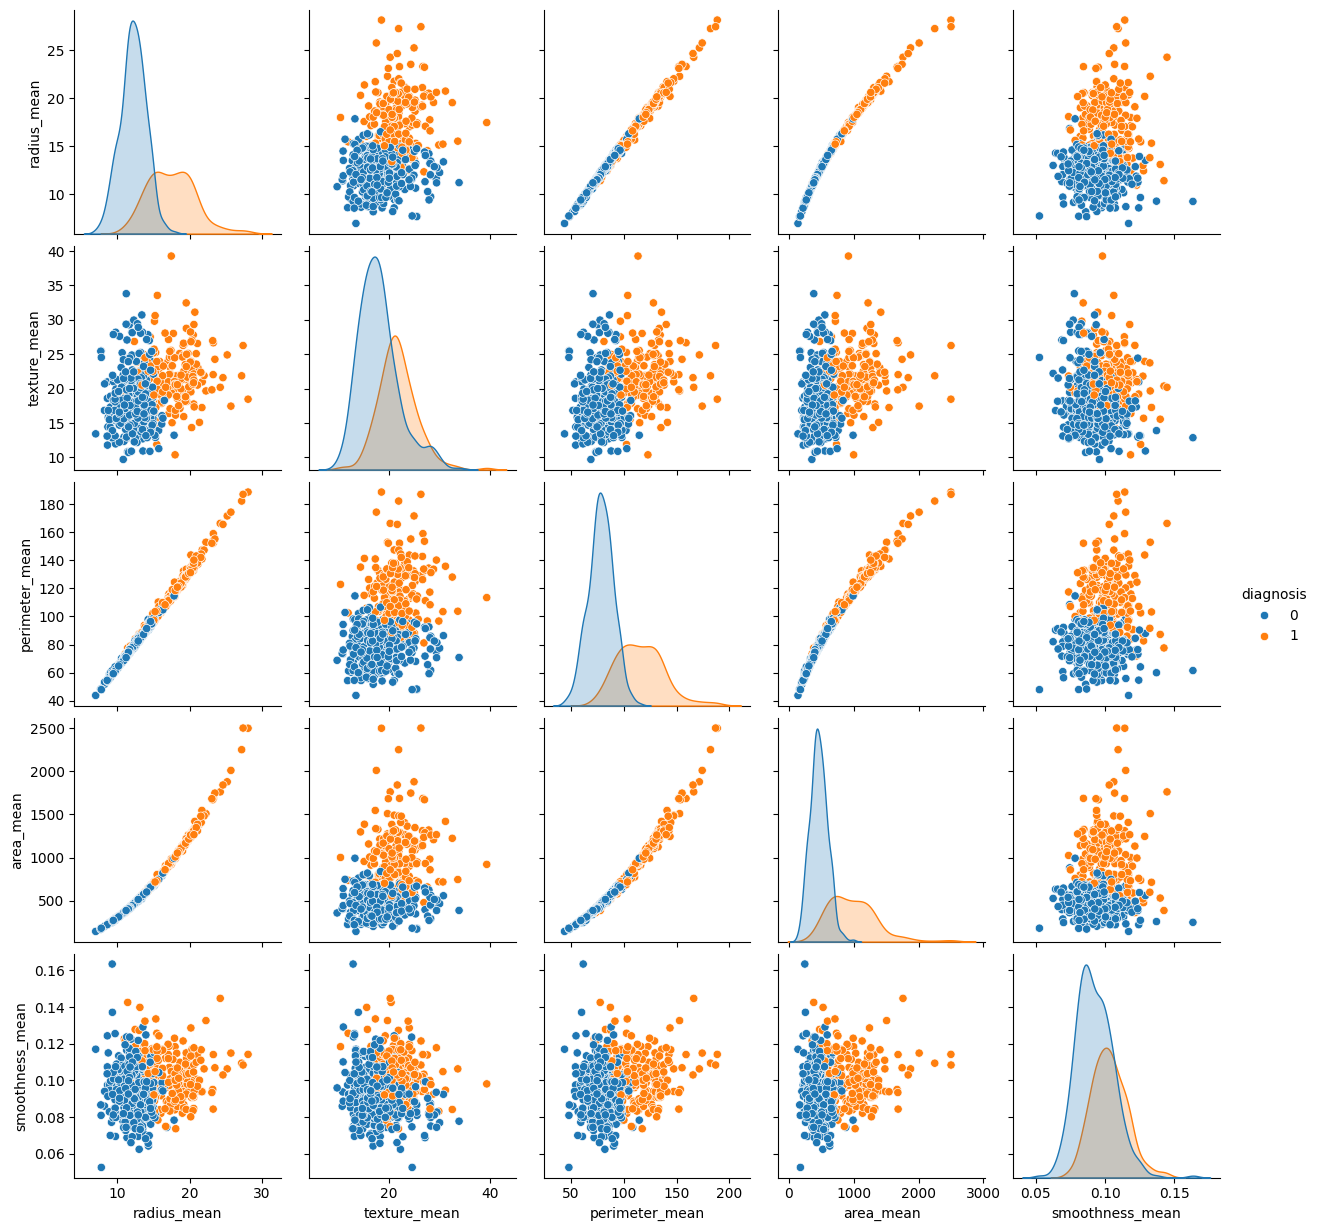

In [ ]:
sns.pairplot(df.iloc[:,1:7], hue = 'diagnosis')

In [ ]:
#co-relation between columns
df.iloc[:,1:11].corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis             1.000000     0.730029      0.415185        0.742636   
radius_mean           0.730029     1.000000      0.323782        0.997855   
texture_mean          0.415185     0.323782      1.000000        0.329533   
perimeter_mean        0.742636     0.997855      0.329533        1.000000   
area_mean             0.708984     0.987357      0.321086        0.986507   
smoothness_mean       0.358560     0.170581     -0.023389        0.207278   
compactness_mean      0.596534     0.506124      0.236702        0.556936   
concavity_mean        0.696360     0.676764      0.302418        0.716136   
concave points_mean   0.776614     0.822529      0.293464        0.850977   
symmetry_mean         0.330499     0.147741      0.071401        0.183027   

                     area_mean  smoothness_mean  compactness_mean  \
diagnosis             0.708984         0.358560          0.596534   
radius_mean           0.987357         0.170581          0.506124   
texture_mean          0.321086        -0.023389          0.236702   
perimeter_mean        0.986507         0.207278          0.556936   
area_mean             1.000000         0.177028          0.498502   
smoothness_mean       0.177028         1.000000          0.659123   
compactness_mean      0.498502         0.659123          1.000000   
concavity_mean        0.685983         0.521984          0.883121   
concave points_mean   0.823269         0.553695          0.831135   
symmetry_mean         0.151293         0.557775          0.602641   

                     concavity_mean  concave points_mean  symmetry_mean  
diagnosis                  0.696360             0.776614       0.330499  
radius_mean                0.676764             0.822529       0.147741  
texture_mean               0.302418             0.293464       0.071401  
perimeter_mean             0.716136             0.850977       0.183027  
area_mean                  0.685983             0.823269       0.151293  
smoothness_mean            0.521984             0.553695       0.557775  
compactness_mean           0.883121             0.831135       0.602641  
concavity_mean             1.000000             0.921391       0.500667  
concave points_mean        0.921391             1.000000       0.462497  
symmetry_mean              0.500667             0.462497       1.000000

<Axes: >

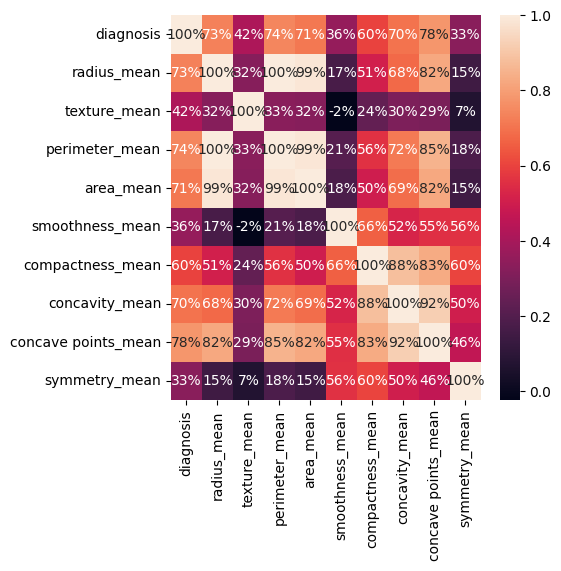

In [ ]:
#heatmap
plt.figure(figsize = (5,5))
sns.heatmap(df.iloc[:,1:11].corr(), cmap ="rocket", annot = True, fmt = ".0%") # other color palletes are YlGnBu, rocket_r, tab10, etc

In [ ]:
#feature scalling
#split our dataset into independent and dependent datasets
#independent --> X
#dependent --> Y
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [ ]:
#80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(Y_train[:5])  # First 5 elements
print(np.unique(Y_train))  # Unique values in the array
print(Y_train.dtype)  # Data type of the array
Y_train = Y_train.astype(int)  # Convert to integers


[0 0 0 0 0]
[0 1]
object


In [ ]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.81232053,
        -0.75798367, -0.01614761],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.37504806,
        -0.60687023,  0.09669004],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.18298917,
        -0.02371948, -0.20050207],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.76769066,
        -0.97974953, -0.71542314],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.34136004,
        -1.75401433, -1.58157125],
       [-0.73694129,  1.14989702, -0.71226578, ...,  0.47893704,
        -0.27460457, -1.25895095]])

In [ ]:
# Importing modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def models(X_train, Y_train):
    # Logistic regression classifier
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Decision tree classifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Random forest classifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # Print the accuracy of each model on the training dataset
    print("The accuracy of Logistic Regression: ", log.score(X_train, Y_train))
    print("The accuracy of Decision Tree: ", tree.score(X_train, Y_train))
    print("The accuracy of Random Forest: ", forest.score(X_train, Y_train))

    return log, tree, forest



In [ ]:
model = models(X_train, Y_train)

The accuracy of Logistic Regression:  0.989010989010989
The accuracy of Decision Tree:  1.0
The accuracy of Random Forest:  0.9978021978021978


In [ ]:
from sklearn.metrics import confusion_matrix

# Ensure predictions are binary
predictions = (model[0].predict(X_test) > 0.5).astype(int)

# Ensure Y_test and predictions are compatible
Y_test = Y_test.astype(int)
predictions = predictions.astype(int)

# Check for shape consistency
Y_test = Y_test.ravel()
predictions = predictions.ravel()

# Compute confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Extract confusion matrix components
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]

# Print confusion matrix and accuracy
print(cm)
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))

[[66  1]
 [ 3 44]]
Accuracy:  0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model: ',i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model:  0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Model:  1
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

0.9385964912280702

Model:  2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weig

In [ ]:
#prediction
pred = model[2].predict(X_test)
print('Our model prediction: ')
print(pred)
print()
print('Actual prediction: ')
print(Y_test)

Our model prediction: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

Actual prediction: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Saving and Downloading the model in pkl format

In [ ]:
import joblib
joblib.dump(model[2], 'breast_cancer_model.pkl')  # Saving RandomForestClassifier
from google.colab import files
files.download('breast_cancer_model.pkl') #downloading the model in pkl file format


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finding the top 10 important features while maintining the accuracy


In [ ]:
import numpy as np
import pandas as pd

# Get feature importance scores
feature_importance = model[2].feature_importances_  # Accessing RandomForest model

# Use actual feature names from the dataset (excluding target column)
df = pd.read_csv('/content/data.csv')  # Load the dataset again if needed
feature_names = df.columns[2:31]  # Selecting actual feature names

# Ensure lengths match
if len(feature_names) != len(feature_importance):
    print(f"Mismatch: {len(feature_names)} feature names vs {len(feature_importance)} importance scores")

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importance_df.head(10))  # Show top 10 most important features


                 Feature  Importance
7    concave points_mean    0.221213
23            area_worst    0.181682
2         perimeter_mean    0.106572
20          radius_worst    0.086698
6         concavity_mean    0.067109
27  concave points_worst    0.049185
26       concavity_worst    0.040921
21         texture_worst    0.031495
13               area_se    0.027068
22       perimeter_worst    0.022817
